This notebook was created by dlk253 for PUI 2016 HW11


#import libraries
import pylab as pl
import pandas as pd
import numpy as np
import json
import scipy.stats
import os
import zipfile as zf
import matplotlib.pyplot as plt
import requests
%pylab inline

In [106]:
import pylab as pl
import pandas as pd

from pandas import DataFrame
import numpy as np
from os import system
import json
import scipy.stats
import os
import zipfile as zf
import matplotlib.pyplot as plt
import requests
%pylab inline
from geopandas import GeoDataFrame
import shapely
from fiona.crs import from_epsg
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import shapefile 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [94]:
os.getenv('PUIDATA')
!echo $PUIDATA
print(os.getenv('PUIDATA'))


None


In [95]:
!curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip"
zip_ref = zf.ZipFile('nycb2010_16d.zip', 'r')
zip_ref.extractall()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5616k  100 5616k    0     0  9869k      0 --:--:-- --:--:-- --:--:--  9.9M


In [96]:
ct_path = 'nycb2010.shp'
ct_shape = GeoDataFrame.from_file(ct_path)
ct_shape.head()

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.



,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [97]:
#the conversion code was provided by Jon Toy to our whats app group. This will convert the geometries to latlong
ct_shape.crs = from_epsg(2263)
ct_shape_latlon = ct_shape.to_crs(epsg=4326)
ct_shape_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374566...
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438018 40.61085506705415...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910642 40.62600632452711...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,POLYGON ((-74.08708799689826 40.61116883123923...
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511992 40.60100160655585...


In [98]:
#just get brooklyn, because I know that CUSP is in Brooklyn
brooklyn_latlon = ct_shape_latlon[ct_shape_latlon['BoroName'] == 'Brooklyn']
print(brooklyn_latlon)


         BCTCB2010 BoroCode  BoroName CB2010  CT2010    Shape_Area  \
5037   30002001000        3  Brooklyn   1000  000200  2.084850e+05   
5038   30003011000        3  Brooklyn   1000  000301  6.336596e+04   
5039   30005011000        3  Brooklyn   1000  000501  1.163032e+05   
5040   30011001000        3  Brooklyn   1000  001100  5.480231e+04   
5041   30015001000        3  Brooklyn   1000  001500  7.919653e+04   
5042   30020001000        3  Brooklyn   1000  002000  2.031509e+05   
5043   30022001000        3  Brooklyn   1000  002200  2.029898e+05   
5044   30030001000        3  Brooklyn   1000  003000  2.288488e+03   
5045   30031001000        3  Brooklyn   1000  003100  2.144473e+05   
5046   30033001000        3  Brooklyn   1000  003300  2.582286e+05   
5047   30035001000        3  Brooklyn   1000  003500  1.046964e+04   
5048   30037001000        3  Brooklyn   1000  003700  1.508060e+05   
5049   30038001000        3  Brooklyn   1000  003800  2.030397e+05   
5050   30041001000  

In [100]:
#cusp point

point = shapely.geometry.Point(-73.986609, 40.693127)

In [101]:
print(point)

POINT (-73.986609 40.693127)


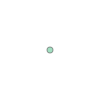

In [102]:
#look at the point
point


In [103]:
#point = shapely.geometry.Point(40.693217, -73.986403)
#saving the index
index_cusp_polygon = []
for i, ct in enumerate(brooklyn_latlon['geometry']):
    if shapely.geometry.asShape(ct).contains(shapely.geometry.Point(-73.986609, 40.693127)):
        index_cusp_polygon.append(i)
        print('CUSP is contained in', ct)
          #print("Found shape for point.")
       


('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7fe69d9fd5d0>)


In [113]:
raw_data = {'latitude': [40.693217],
            'longitude': [-73.986403]}
df = pd.DataFrame(raw_data, columns = ['latitude', 'longitude'])
df

,latitude,longitude
0,40.693217,-73.986403


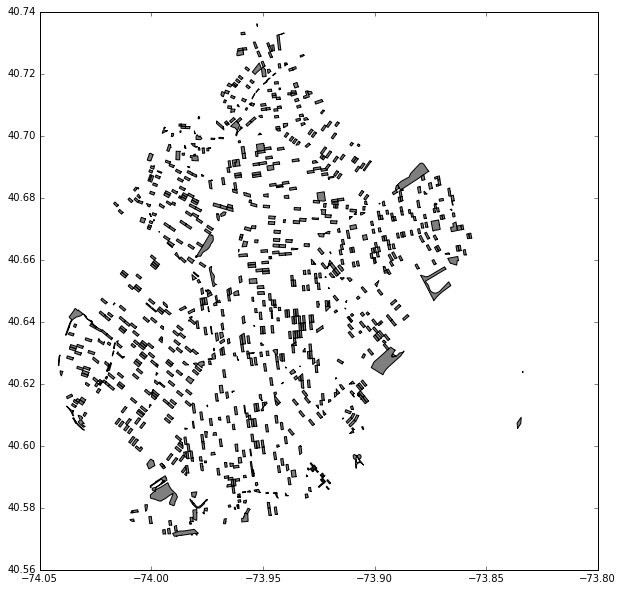

In [119]:
pl.figure(figsize = (20,20))
fig, ax = plt.subplots(1)
#every 10 and plot it out
brooklyn_latlon.sample(frac = 0.1).plot(ax=ax, color="#000000")

fig = pl.gcf()
fig.set_size_inches(10, 10)


Fig 1: Shows every ten polygons of brooklyn. I tried to get the point where cusp is located to print on top but was having trouble locating it.


In [ ]:
#@Review: Not visible CUSP location.